### Worked Example 1

This cell imports the DoubleMLData class from the doubleml library and the fetch_401K function from the doubleml.datasets module.

The CM 401(k) pension plan dataset, featured in the DoubleML tutorial, provides a rich context for analyzing the impact of 401(k) plan eligibility on financial assets. Utilizing a partial linear regression model, the analysis aims to isolate the causal effect of eligibility, adjusting for confounding variables through control covariates. This example underscores DoubleML's application in real-world economic research, highlighting its capability to address complex causal questions by leveraging advanced machine learning techniques within a rigorous statistical framework.

In [1]:
from doubleml import DoubleMLData
from doubleml.datasets import fetch_401K


This cell fetches the 401K dataset and stores it in a pandas DataFrame named df.

In [2]:
df = fetch_401K(return_type='DataFrame')

In [3]:
df

,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown
0,0.0,0.0,4500.0,47,6765.0,2,8,0,0,0,0,0,0,1
1,6215.0,1015.0,22390.0,36,28452.0,1,16,0,0,0,0,0,0,1
2,0.0,-2000.0,-2000.0,37,3300.0,6,12,1,0,0,0,0,0,0
3,15000.0,15000.0,155000.0,58,52590.0,2,16,0,1,1,0,0,0,1
4,0.0,0.0,58000.0,32,21804.0,1,11,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,98498.0,98858.0,157858.0,52,73920.0,1,16,1,0,0,1,1,0,1
9911,287.0,6230.0,15730.0,41,42927.0,4,14,0,1,1,1,1,1,1
9912,99.0,6099.0,7406.0,40,23619.0,2,16,1,0,0,1,0,1,0
9913,0.0,-32.0,2468.0,47,14280.0,4,6,1,0,0,1,1,0,0


In [4]:
df.head()

,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown
0,0.0,0.0,4500.0,47,6765.0,2,8,0,0,0,0,0,0,1
1,6215.0,1015.0,22390.0,36,28452.0,1,16,0,0,0,0,0,0,1
2,0.0,-2000.0,-2000.0,37,3300.0,6,12,1,0,0,0,0,0,0
3,15000.0,15000.0,155000.0,58,52590.0,2,16,0,1,1,0,0,0,1
4,0.0,0.0,58000.0,32,21804.0,1,11,0,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9915 entries, 0 to 9914
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nifa     9915 non-null   float32
 1   net_tfa  9915 non-null   float32
 2   tw       9915 non-null   float32
 3   age      9915 non-null   int8   
 4   inc      9915 non-null   float32
 5   fsize    9915 non-null   int8   
 6   educ     9915 non-null   int8   
 7   db       9915 non-null   int8   
 8   marr     9915 non-null   int8   
 9   twoearn  9915 non-null   int8   
 10  e401     9915 non-null   int8   
 11  p401     9915 non-null   int8   
 12  pira     9915 non-null   int8   
 13  hown     9915 non-null   int8   
dtypes: float32(4), int8(10)
memory usage: 251.9 KB


In [6]:
df.describe()

,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown
count,9.915000e+03,9.915000e+03,9.915000e+03,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000
mean,1.392864e+04,1.805153e+04,6.381685e+04,41.060212,37200.621094,2.865860,13.206253,0.271004,0.604841,0.380837,0.371357,0.261624,0.242158,0.635199
std,5.490488e+04,6.352250e+04,1.115297e+05,10.344505,24774.289062,1.538937,2.810382,0.444500,0.488909,0.485617,0.483192,0.439541,0.428411,0.481399
min,0.000000e+00,-5.023020e+05,-5.023020e+05,25.000000,-2652.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+02,-5.000000e+02,3.291500e+03,32.000000,19413.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.635000e+03,1.499000e+03,2.510000e+04,40.000000,31476.000000,3.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.765500e+03,1.652450e+04,8.148750e+04,48.000000,48583.500000,4.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.430298e+06,1.536798e+06,2.029910e+06,64.000000,242124.000000,13.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This cell creates a **DoubleMLData object named dml_data** from the DataFrame df. It specifies the target variable as **'net_tfa', the treatment variable as 'e401'**, and the control variables as a list of column names.

The next few cells define different machine learning models **(Random Forest and XGBoost)** for regression and classification tasks.

1. #### Data-Backend

Declare the roles for the treatment variable, the outcome variable and controls

In [7]:
dml_data = DoubleMLData(df,
                        y_col='net_tfa',
                        d_cols='e401',
                        x_cols= ['age','inc','educ','fsize','marr',
                                 'twoearn','db','pira','hown']
                        )

### Causal Model 
Choose your DoubleML model
<div style="text-align:center">
    <img src="data/choosingmodel.png" alt="Image Alt Text" height="300", width="300"/>
</div>


This cell creates a DoubleMLPLR object named **dm_plr_rf** using the dml_data object and the specified machine learning models **(ml_l_rf and ml_m_rf)**. It also sets a random seed for reproducibility.

   ### ML Methods
Initialize the learners with hyperparameters

In [8]:
# Random forest Learners
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
ml_l_rf = RandomForestRegressor(n_estimators = 500, max_depth = 7,
                                max_features = 3, min_samples_leaf = 3)
ml_m_rf = RandomForestClassifier(n_estimators = 500, max_depth = 7,
                                 max_features = 4, min_samples_leaf = 7)

In [9]:
#Xgb Learners

from xgboost import XGBRegressor, XGBClassifier

ml_l_xgb = XGBRegressor(objective='reg:squarederror', eta = 0.1,
                         n_estimators = 35)

ml_m_xgb = XGBClassifier(objective='binary:logistic', eta = 0.1,n_estimators = 35,
                         use_label_encoder=False, eval_metric = 'logloss')

### DML Specifications
Initialize the model DoubleML object

In [10]:
import numpy as np
from doubleml import DoubleMLPLR

np.random.seed(3141)
#default values
dm_plr_rf = DoubleMLPLR(dml_data, 
                        ml_l = ml_l_rf,
                        ml_m = ml_m_rf )

This cell creates another **DoubleMLPLR** object with additional parameters specified, such as the **number of folds for cross-validation, the number of repetitions, the score function, and the DoubleML** procedure.

In [11]:
# Parametrized by user
dml_plr_rf = DoubleMLPLR(dml_data,
                         ml_l= ml_l_rf,
                         ml_m= ml_m_rf,
                         n_folds=3,
                         n_rep=1,
                         score='partialling out',
                         dml_procedure='dml2')

In [12]:
# Estimation
dml_plr_rf.fit()

In [13]:
# Coefficient estimate
dml_plr_rf.coef

array([9130.33358489])

In [14]:
# Standard error
dml_plr_rf.se

array([1312.57938013])

In [15]:
# Summary
dml_plr_rf.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
e401,9130.333585,1312.57938,6.956024,3.500104e-12,6557.725273,11702.941897


In [16]:
print(dml_plr_rf)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: net_tfa
Treatment variable(s): ['e401']
Covariates: ['age', 'inc', 'educ', 'fsize', 'marr', 'twoearn', 'db', 'pira', 'hown']
Instrument variable(s): None
No. Observations: 9915

------------------ Score & algorithm ------------------
Score function: partialling out
DML algorithm: dml2

------------------ Machine learner   ------------------
Learner ml_l: RandomForestRegressor(max_depth=7, max_features=3, min_samples_leaf=3,
                      n_estimators=500)
Learner ml_m: RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=7,
                       n_estimators=500)
Out-of-sample Performance:
Learner ml_l RMSE: [[53695.47832778]]
Learner ml_m RMSE: [[0.44262584]]

------------------ Resampling        ------------------
No. folds: 3
No. repeated sample splits: 1
Apply cross-fitting: True

------------------ Fit summary       ----------

These cells fit the DoubleML model, print the coefficient estimates, standard errors, summary, and a string representation of the model.

The next few cells perform inference tasks, such as calculating confidence intervals and bootstrapping for the DoubleML model.

### Inference

In [17]:
dml_plr_rf.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
e401,9130.333585,1312.57938,6.956024,3.500104e-12,6557.725273,11702.941897


In [18]:
dml_plr_rf.confint(level=0.95)

,2.5 %,97.5 %
e401,6557.725273,11702.941897


In [19]:
_ = dml_plr_rf.bootstrap()

dml_plr_rf.confint(joint = True)

,2.5 %,97.5 %
e401,6674.121023,11586.546147


In [20]:
from doubleml import DoubleMLClusterData, DoubleMLPLIV
from doubleml.datasets import make_pliv_multiway_cluster_CKMS2021
from sklearn.base import clone 

df = make_pliv_multiway_cluster_CKMS2021(return_type='DataFrame', dim_X=10)
learner = RandomForestRegressor()                   

In [21]:
dml_cluster_data = DoubleMLClusterData(df, y_col='Y', d_cols='D', z_cols='Z',
                                        cluster_cols=['cluster_var_i', 'cluster_var_j'])

In [22]:
dml_pliv_obj = DoubleMLPLIV(dml_cluster_data, ml_l=clone(learner), ml_m=clone(learner), ml_r=clone(learner))    
_ = dml_pliv_obj.fit()
print(dml_pliv_obj)

================== DoubleMLPLIV Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['D']
Cluster variable(s): ['cluster_var_i', 'cluster_var_j']
Covariates: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
Instrument variable(s): ['Z']
No. Observations: 625

------------------ Score & algorithm ------------------
Score function: partialling out
DML algorithm: dml2

------------------ Machine learner   ------------------
Learner ml_l: RandomForestRegressor()
Learner ml_m: RandomForestRegressor()
Learner ml_r: RandomForestRegressor()
Out-of-sample Performance:
Learner ml_l RMSE: [[1.13259852]]
Learner ml_m RMSE: [[0.62489513]]
Learner ml_r RMSE: [[0.907852]]

------------------ Resampling        ------------------
No. folds per cluster: 5
No. folds: 25
No. repeated sample splits: 1
Apply cross-fitting: True

------------------ Fit summary       ------------------
      coef   std err         t        

These cells create a simulated dataset df for partially linear instrumental variables (PLIV) regression, define a machine learning model (learner), create a DoubleMLClusterData object (dml_cluster_data) with specified columns, create a DoubleMLPLIV object (dml_pliv_obj) using the cluster data and machine learning models, fit the PLIV model, and print its representation.

The remaining cells demonstrate the use of other DoubleML objects and methods, such as DoubleMLIRM for estimating conditional average treatment effects (CATE), DoubleMLQTE for estimating quantile treatment effects, and related functions for calculating confidence intervals and visualizing results.

In [23]:
## CATE

from doubleml import DoubleMLIRM

dml_irm = DoubleMLIRM(dml_data,
                      ml_g = ml_l_rf,
                      ml_m = ml_m_rf,
                      n_folds = 3,
                      n_rep = 1)
_ = dml_irm.fit()
dml_irm.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
e401,7998.785478,1126.615721,7.099835,1.249061e-12,5790.659242,10206.911715


In [24]:
import pandas as pd
groups = pd.DataFrame(columns=['Group'], index=range(dml_data.data["inc"].shape[0]),dtype=str)
for i,x_i in enumerate(dml_data.data["inc"]):
    if x_i <=dml_data.data["inc"].median():
        groups.loc[i] = '1'
    else:
        groups.loc[i] = '2'

gate = dml_irm.gate(groups=groups)
ci_gate = gate.confint()
print(ci_gate)

               2.5 %        effect        97.5 %
Group_1  1725.671877   3325.607095   4925.542313
Group_2  8560.421124  12672.906605  16785.392087


In [25]:
ci_gate_joint = gate.confint(joint=True)
print(ci_gate_joint)

               2.5 %        effect        97.5 %
Group_1   595.379826   3325.607095   6055.834364
Group_2  5655.109962  12672.906605  19690.703249


In [26]:
import patsy

age_data = dml_data.data["age"]
design_matrix = patsy.dmatrix("bs(age, df=6, degree=3)",{ "age": age_data})
spline_basis = pd.DataFrame(design_matrix)

cate = dml_irm.cate(spline_basis)
print(cate)

================== DoubleMLBLP Object ==================

------------------ Fit summary ------------------
           coef       std err         t     P>|t|        [0.025        0.975]
0   2797.356151   6288.913107  0.444808  0.656469  -9530.192976  15124.905278
1  -7183.971561  11379.038652 -0.631334  0.527837 -29489.202307  15121.259185
2  10142.606699   8099.113918  1.252311  0.210486  -5733.304290  26018.517689
3   -481.374518   8937.250110 -0.053862  0.957047 -18000.202956  17037.453920
4  21426.565495  10020.917225  2.138184  0.032526   1783.529047  41069.601942
5  -5034.946887  12044.546299 -0.418027  0.675936 -28644.708013  18574.814240
6  16566.655770   9890.952718  1.674930  0.093979  -2821.623803  35954.935344


In [27]:
new_data = {"age": np.linspace(np.quantile(age_data,0.2), np.quantile(age_data,0.8), 50)}
spline_grid = pd.DataFrame(patsy.build_design_matrices([design_matrix.design_info], new_data)[0])
df_cate = cate.confint(spline_grid, level=0.95, joint=True, n_rep_boot=2000)
print(df_cate.head(n=8))              

        2.5 %       effect        97.5 %
0 -614.885351  5037.624195  10690.133741
1 -335.769345  5690.656470  11717.082284
2 -124.008563  6271.379541  12666.767645
3   76.319746  6756.278820  13436.237893
4  291.360353  7138.965871  13986.571389
5  514.606173  7428.082707  14341.559240
6  722.163354  7632.781617  14543.399879
7  878.815272  7762.214891  14645.614509


In [28]:
#Quantile Treatment Effects

from doubleml import DoubleMLQTE
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.base import clone 

tau_vec = np.arange(0.1,0.95,0.2)
n_folds = 5

class_learner = LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=10)
np.random.seed(3141)
dml_QTE = DoubleMLQTE(dml_data, ml_g=clone(class_learner), ml_m=clone(class_learner), 
                      quantiles=tau_vec, score='PQ', normalize_ipw=True)

_ = dml_QTE.fit()
print(dml_QTE)


[LightGBM] [Info] Number of positive: 1178, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3172, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371375 -> initscore=-0.526325
[LightGBM] [Info] Start training from score -0.526325
[LightGBM] [Info] Number of positive: 1179, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3173, number of used features: 9
[LightGBM] [Info] [binary:Bo

The provided code demonstrates the use of the **doubleml** library for various econometric and machine learning tasks. It begins by loading and exploring the 401K dataset from the **doubleml.datasets** module. A **DoubleMLData** object is created to organize the data for DoubleML analysis, specifying the target, treatment, and control variables. The code defines machine learning models (Random Forest and XGBoost) for regression and classification tasks, which will be used as learners in the DoubleML procedures.

It then performs partially linear regression (PLR) analysis using the **DoubleMLPLR** class, including model fitting, accessing coefficients, standard errors, and summary. The code also conducts inference tasks for the PLR model, such as calculating confidence intervals and bootstrapping. Furthermore, it handles partially linear instrumental variables (PLIV) regression using the **DoubleMLClusterData and DoubleMLPLIV** classes, with simulated data and machine learning models for outcome, treatment, and instrument models.

The code demonstrates estimating conditional average treatment effects **(CATE)** with the **DoubleMLIRM** class, including group-based CATE estimation, confidence intervals, and CATE as a function of a continuous variable using spline basis functions. Additionally, it estimates quantile treatment effects (QTE) using the **DoubleMLQTE** class, specifying quantiles of interest and additional parameters. Overall, the code provides a comprehensive demonstration of the doubleml library's capabilities and its potential applications in econometric and machine learning analyses, covering various types of regression models, treatment effect estimation, and inference techniques.



### Worked Example 2 

In [29]:
# Disabling warnings output
import warnings
from sklearn. exceptions import DataConversionWarning, ConvergenceWarning
warnings. filterwarnings(action='ignore', category=DataConversionWarning)
warnings. filterwarnings(action='ignore', category=ConvergenceWarning)
warnings. filterwarnings(action='ignore', category=UserWarning)
#!pip install dowhy
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/CausalAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
df = pd.read_csv('hotel_cancellations.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17


In [31]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Feature Engineering
Lets create some new and meaningful features so as to reduce the dimensionality of the dataset.

• Total Stay = stays_in_weekend_nights + stays_in_week_nights

• Guests = adults + children + babies

• Different_room_assigned = 1 if reserved_room_type & assigned_room_type are different, 0 otherwise.

In [32]:
# Total stay in nights
df['total_stay'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']
# Total number of guests
df['guests'] = df['adults']+df['children'] +df['babies']
# Creating the different_room_assigned feature
df['different_room_assigned']=0
slice_indices =df['reserved_room_type']!=df['assigned_room_type']
df.loc[slice_indices,'different_room_assigned']=1
# Deleting older features
df = df.drop(['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies'
                        ,'reserved_room_type','assigned_room_type'],axis=1)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay', 'guests',
       'different_room_assigned'],
      dtype='object')

We also remove other columns that either contain NULL values or have too many unique values (e.g., agent ID). We also impute missing values of the country column with the most frequent country. We remove distribution_channel since it has a high overlap with market_segment.

In [33]:
df.isnull().sum() # Country, Agent, Company contain 488,16340,112593 missing entries
df = df.drop(['agent','company'], axis=1)
##Replace missing countries with most frequently occuring country
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [34]:
df = df.drop(['reservation_status', 'reservation_status_date','arrival_date_day_of_month' ],axis=1)

In [35]:
df = df.drop (['arrival_date_year'],axis=1)
df = df.drop(['distribution_channel'], axis=1)

In [37]:
# Replacing 1 by True and 0 by False for the experiment and outcome variables
df['different_room_assigned']= df['different_room_assigned'].replace(1,True)
df['different_room_assigned']= df['different_room_assigned'].replace(0,False)
df['is_canceled']= df['is_canceled'].replace(1,True)
df['is_canceled']= df['is_canceled'].replace(0,False)
df.dropna(inplace=True)
print(df.columns)
df.iloc[:, 5:20].head(100)

/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_34846/2986621135.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_canceled']= df['is_canceled'].replace(0,False)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned'],
      dtype='object')


,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests
0,BB,PRT,Direct,0,0,0,3,No Deposit,0,Transient,0.00,0,0,0,2.0
1,BB,PRT,Direct,0,0,0,4,No Deposit,0,Transient,0.00,0,0,0,2.0
2,BB,GBR,Direct,0,0,0,0,No Deposit,0,Transient,75.00,0,0,1,1.0
3,BB,GBR,Corporate,0,0,0,0,No Deposit,0,Transient,75.00,0,0,1,1.0
4,BB,GBR,Online TA,0,0,0,0,No Deposit,0,Transient,98.00,0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BB,PRT,Online TA,0,0,0,0,No Deposit,0,Transient,73.80,0,1,2,2.0
96,BB,PRT,Online TA,0,0,0,0,No Deposit,0,Transient,117.00,0,1,7,2.0
97,HB,ESP,Offline TA/TO,0,0,0,0,No Deposit,0,Transient,196.54,0,1,7,3.0
98,BB,PRT,Online TA,0,0,0,0,No Deposit,0,Transient,99.30,1,2,7,3.0


In [38]:
df = df[df.deposit_type=="No Deposit"]
df.groupby(['deposit_type','is_canceled']).count()

hotel  lead_time  arrival_date_month  \
deposit_type is_canceled                                         
No Deposit   False        74947      74947               74947   
             True         29690      29690               29690   

                          arrival_date_week_number   meal  country  \
deposit_type is_canceled                                             
No Deposit   False                           74947  74947    74947   
             True                            29690  29690    29690   

                          market_segment  is_repeated_guest  \
deposit_type is_canceled                                      
No Deposit   False                 74947              74947   
             True                  29690              29690   

                          previous_cancellations  \
deposit_type is_canceled                           
No Deposit   False                         74947   
             True                          29690   

                          previous_bookings_not_canceled  booking_changes  \
deposit_type is_canceled                                                    
No Deposit   False                                 74947            74947   
             True                                  29690            29690   

                          days_in_waiting_list  customer_type    adr  \
deposit_type is_canceled                                               
No Deposit   False                       74947          74947  74947   
             True                        29690          29690  29690   

                          required_car_parking_spaces  \
deposit_type is_canceled                                
No Deposit   False                              74947   
             True                               29690   

                          total_of_special_requests  total_stay  guests  \
deposit_type is_canceled                                                  
No Deposit   False                            74947       74947   74947   
             True                             29690       29690   29690   

                          different_room_assigned  
deposit_type is_canceled                           
No Deposit   False                          74947  
             True                           29690

In [39]:
df_copy = df.copy(deep=True)

Calculating Expected Counts

Since the number of number of cancellations and the number of times a different room was assigned is heavily imbalanced, we first choose 1000 observations at random to see that in how many cases do the variables; 'is_cancelled' & 'different_room_assigned' attain the same values. This whole process is then repeated 10000 times and the expected count turns out to be near 50% (i.e. the probability of these two variables attaining the same value at random). So statistically speaking, we have no definite conclusion at this stage. Thus assigning rooms different to what a customer had reserved during his booking earlier, may or may not lead to him/her cancelling that booking.

In [40]:
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = df.sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

We now consider the scenario when there were no booking changes and recalculate the expected count.



In [41]:
# Expected Count when there are no booking changes 
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = df[df["booking_changes"]==0].sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000

In the 2nd case, we take the scenario when there were booking changes(>0) and recalculate the expected count.



In [42]:
# # Expected Count when there are booking changes = 66.4%
# counts_sum=0
# for i in range(1,10000):
#         counts_i = 0
#         rdf = df[df["booking_changes"]>0].sample(1000)
#         counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
#         counts_sum+= counts_i
# counts_sum/10000

There is definitely some change happening when the number of booking changes are non-zero. So it gives us a hint that Booking Changes may be affecting room cancellation.

But is Booking Changes the only confounding variable? What if there were some unobserved confounders, regarding which we have no information(feature) present in our dataset. Would we still be able to make the same claims as before?

In this scenario, the treatment refers to the type of room reserved by the customer during the booking process. The outcome is determined by whether the booking was cancelled or not. Common causes are variables that we believe have a causal impact on both the outcome and the treatment. According to our causal assumptions, the two variables that meet this criteria are 'Booking Changes' and 'Unobserved Confounders'. If we don't explicitly specify the graph (which is not recommended), we can provide these parameters in the function below.

To facilitate the identification of the causal effect, we remove the 'Unobserved Confounder' node from the graph. (To verify, you can use the original graph and run the following code. The `identify_effect` method will find that the effect cannot be identified.)

In [49]:
import pygraphviz
causal_graph = """digraph {
different_room_assigned[label="Different Room Assigned"];
is_canceled[label="Booking Cancelled"];
booking_changes[label="Booking Changes"];
previous_bookings_not_canceled[label="Previous Booking Retentions"];
days_in_waiting_list[label="Days in Waitlist"];
lead_time[label="Lead Time"];
market_segment[label="Market Segment"];
country[label="Country"];
U[label="Unobserved Confounders"];
is_repeated_guest;
total_stay;
guests;
meal;
market_segment -> lead_time;
lead_time->is_canceled; country -> lead_time;
different_room_assigned -> is_canceled;
U -> different_room_assigned; U -> lead_time; U -> is_canceled;
country->meal;
lead_time -> days_in_waiting_list;
days_in_waiting_list ->is_canceled;
previous_bookings_not_canceled -> is_canceled;
previous_bookings_not_canceled -> is_repeated_guest;
is_repeated_guest -> is_canceled;
total_stay -> is_canceled;
guests -> is_canceled;
booking_changes -> different_room_assigned; booking_changes -> is_canceled; 
}"""

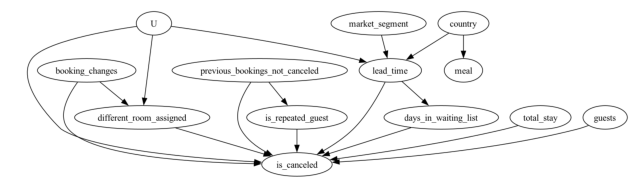

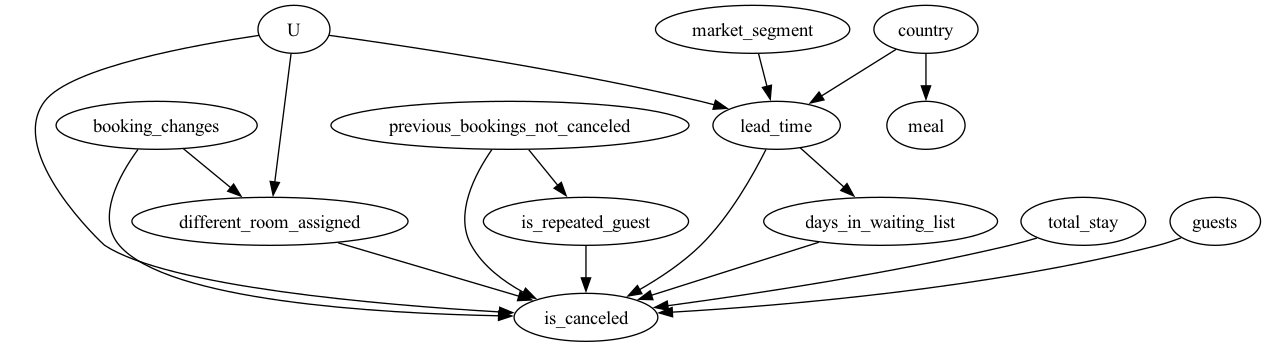

In [53]:
model= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment="different_room_assigned",
        outcome='is_canceled')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))